<h2><b>Лабораторная работа №8</b></h2> <br> <b>Цель работы</b> - Лабораторная работа проверяет знания по рациональным кривым Безье и использованию обычных кривых Безье 4-го порядка как интерполяционных сплайнов.<br><h3><b>Задание 1</b></h3>Реализуйте алгоритм вычисления контрольных точек для кривой Безье третьего порядка.

In [3]:
using Plots # Подключаем библиотеку визуализации

Добавим функцию из лабораторной работы № 6 для отрисовки контура:

In [6]:
function point(p)
    x = []
    y = []
    for i in p
        push!(x, i[1])
        push!(y, i[2])
    end

    plot(x, y,
        line = (:black, 0.8, 2, :dash),
        markershape = :hexagon,
        markersize = 4,
        markercolor = :gray,
        size = (500, 500),
        leg = false)
end;

Отрисуем контур по данным на рисунке точкам

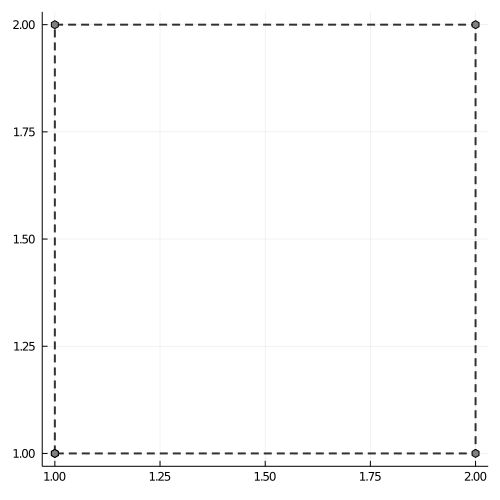

In [8]:
p = [[1.0, 1.0], [1.0, 2.0], [2.0, 2.0], [2.0, 1.0], [1.0, 1.0]] # Координаты точек
point(p) # нарисовали контур

Рассчитаем вектора U

In [9]:
a = [[2, 1, 0, 0] [1, 4, 1, 0] [0, 1, 4, 2] [0, 0, 1, 7]] # Записали нашу матрицу
pp = [[3.0, 5.0] [8.0, 12.0] [12.0, 10.0] [17.0, 9.0]] # Создали вторую матрицу
buf = a\pp'

4×2 Array{Float64,2}:
 0.892857  1.39286
 1.21429   2.21429
 2.25      1.75
 1.78571   0.785714

Мы получили значение веткоров U в матричном виде, а нам нужно в векторном. Преобразуем:

In [12]:
u = [[buf[1], buf[5]], [buf[2], buf[6]], [buf[3], buf[7]], [buf[4], buf[8]]] # Векторный вид
v = [[], [], [], []]; # Шаблон для векторов V

Рассчитаем наши вектора V:

In [14]:
for i in 1:3 # Первые три вектора
    v[i] = 2*p[i+1] - u[i+1]
end
v[4] = (p[5] + u[4])/2; # Четвёрый вектор

Отрисуем получившийся график:

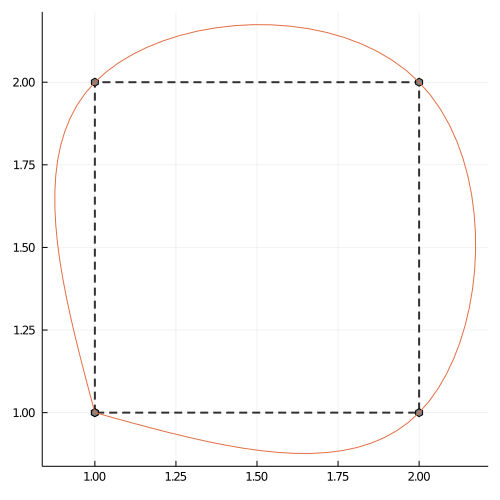

In [15]:
x = []
y = []

for i in 1:4
    for t in 0:0.05:1
        b = p[i]*(1-t)^3 + 3*u[i]*t*(1-t)^2 + 3*v[i]*(1-t)*t^2 + p[i+1]*t^3
        push!(x, b[1])
        push!(y, b[2])
    end
end

plot!(x, y)

<b>Дополнительно</b><br>У нас имеется возможность сделать кривую безье плавной и в начальной точке, для этого нужно:

In [18]:
u = [[buf[1], buf[5]], [buf[2], buf[6]], [buf[3], buf[7]], [buf[4], buf[8]], [buf[1], buf[5]]] # Замкнуть вектора u
for i in 1:4 # Рассчитать новые вектора v
    v[i] = 2*p[i+1] - u[i+1]
end

И визуализировать

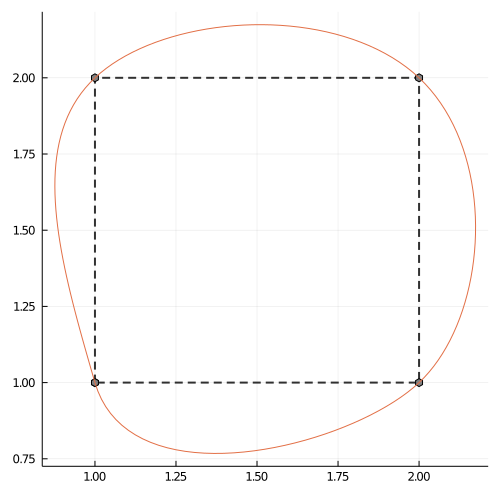

In [62]:
point(p)

x = []
y = []

for i in 1:4
    for t in 0:0.025:1
        b = p[i]*(1-t)^3 + 3*u[i]*t*(1-t)^2 + 3*v[i]*(1-t)*t^2 + p[i+1]*t^3
        push!(x, b[1])
        push!(y, b[2])
    end
end
plot!(x, y)

Анимируем построение:

┌ Info: Saved animation to 
│   fn = /home/dz/Desktop/lab9/tmp.gif
└ @ Plots /home/dz/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/dz/Desktop/lab9/tmp.gif")
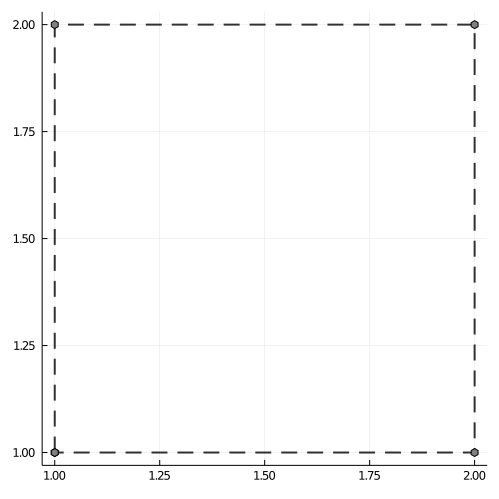

In [64]:
point(p)
@gif for i in 1:length(x)
    plot!(x[1:i], y[1:i], c = :blue)
end

<h3><b>Задание №2</b></h3>С помощью рациональной кривой Безье 2-го порядка нарисуйте полную окружность.<br> Для начала изменим функцию построения кривой Безье через полиномы Бернштейна из прошлой лабораторной работы:

In [93]:
# Число сочетаний из n по k
function C(n, k)
    try
        return factorial(n)/(factorial(k) * factorial(n-k))
    catch
        return 0
    end
end;

# Полиномы Бернштейна
function B(n, i, t)
    return C(n, i) * (t^i) * (1-t)^(n-i)
end;

# Полиномы Бернштейна
function bern(n, i, t)
    if (n < i || i < 0)
        return 0.0
    elseif (i==0 && n==0)
        return 1.0
    elseif (n == i)
        return t^n
    elseif (i == 0)
        return (1-t)^n
    else
        return t * B(n-1, i-1, t) + (1 - t) * B(n-1, i, t)
    end
end;

function bezier_func(p, w) # Функция, строящая кривую Безье
    n = length(p) - 1
    t = 0:0.01:1
    x = []
    y = []
    for t in 0:0.025:1
        a = [0, 0]
        b = [0, 0]
        c = 0
        for i in 0:n
            a += w[i+1] * p[i+1] * bern(n, i, t)
            c += w[i+1] * bern(n, i, t)
            b = a/c
        end
        push!(x, b[1])
        push!(y, b[2])
    end
    plot!(x, y,
        color = :blue)
end;

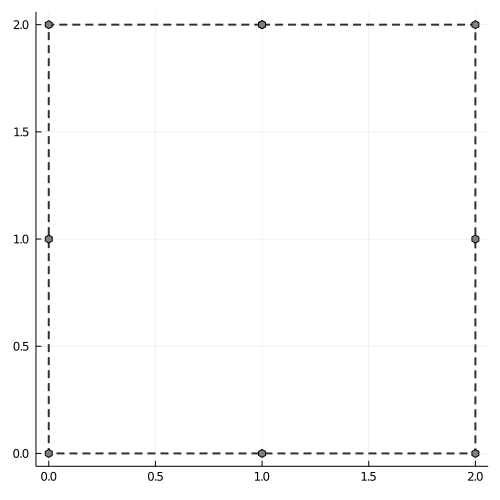

In [94]:
# Рисуем наш описанный квадрат
p = [[1.0, 2.0], [2.0, 2.0], [2.0, 1.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [1.0, 2.0]] # Координаты точек
point(p) # нарисовали контур

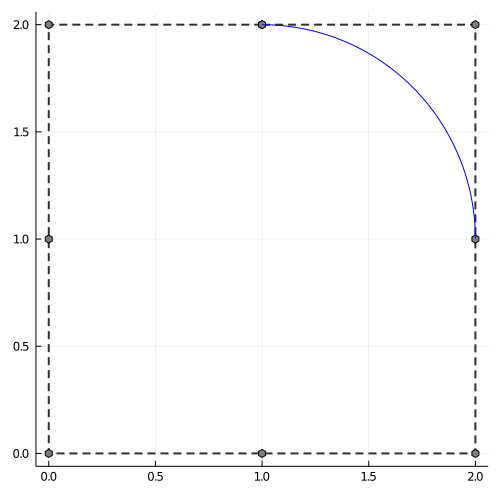

In [95]:
# Отрисовывем четверти дуг
p = [[1.0, 2.0], [2.0, 2.0], [2.0, 1.0]]
w = [1.0 1.0 2.0]
bezier_func(p, w)

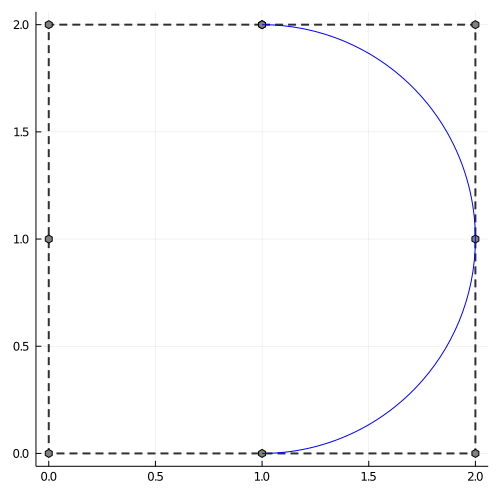

In [96]:
# Отрисовывем четверти дуг
p = [[2.0, 1.0], [2.0, 0.0], [1.0, 0.0]]
w = [1.0 1.0 2.0]
bezier_func(p, w)

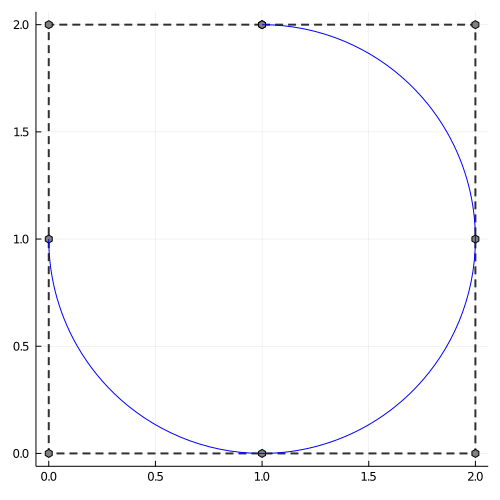

In [97]:
# Отрисовывем четверти дуг
p = [[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]]
w = [1.0 1.0 2.0]
bezier_func(p, w)

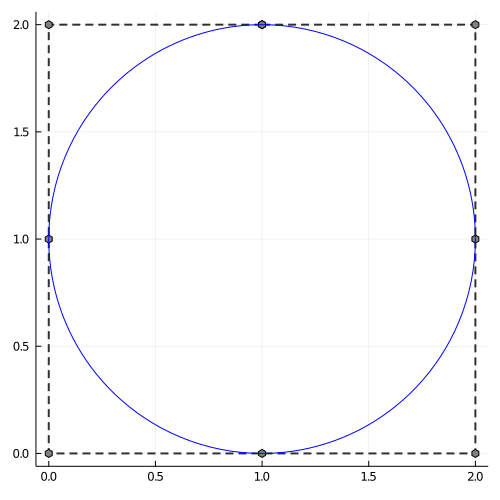

In [98]:
# Отрисовывем четверти дуг
p = [[0.0, 1.0], [0.0, 2.0], [1.0, 2.0]]
w = [1.0 1.0 2.0]
bezier_func(p, w)

<b>Вывод:</b> мы успешно завершили лабораторную работу №8 и выполнили задания для самостоятельной работы.